In [11]:
import os
import sys
import csv
import tqdm
import pandas
from itertools import permutations

# from fuzzyset import FuzzySet
from cfuzzyset import cFuzzySet as FuzzySet

from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
!head ../data/normalization/train_xml_normalization_map_step2.txt

In [45]:
# Load the training data from the provided XML documents and parsed
# by the ../src/normalization_construct_trainingdata_step2_buildmap.py script.

fh = open('../data/normalization/train_xml_normalization_map_step2.txt')
# fh = open('../data/normalization/gold_xml_normalization_map_step2.txt')
reader = csv.reader(fh)
header = next(reader)

training_map = dict()

for source_xml, raw_string, meddra_pt_id, is_abbreviation, expanded_term in reader:
    
    query_string = raw_string.lower()
    
    if is_abbreviation == 'True':
        query_string = expanded_term.lower()
    
    training_map[query_string] = meddra_pt_id
    
fh.close()

In [6]:
# Load all the strings from meddra 23.1 and map them to the preferred term id
fh = open('../data/meddra_pt_llt_map_omop_v23.1.csv')
reader = csv.reader(fh)
header = next(reader)

meddra_strings = dict()
meddra_sorted_fuzzyset = FuzzySet()

for pt_concept_id, pt_concept_name, pt_meddra_id, llt_concept_id, llt_concept_name, llt_meddra_id in reader:
        
    # PT
    sorted_pt_concept_name = ' '.join(sorted(pt_concept_name.lower().split()))
    meddra_sorted_fuzzyset.add(sorted_pt_concept_name)
    meddra_strings[sorted_pt_concept_name] = pt_meddra_id
    
    # LLT
    sorted_llt_concept_name = ' '.join(sorted(llt_concept_name.lower().split()))
    meddra_sorted_fuzzyset.add(sorted_llt_concept_name)
    meddra_strings[sorted_llt_concept_name] = pt_meddra_id

fh.close()

len(meddra_strings)    

59760

In [46]:
# Idenify exact matches and skip them (we'll just match them using string matching)
terms_to_match = set()
for term in training_map.keys():
    if term in meddra_strings:
        # exact match, skip
        continue
    terms_to_match.add(term)

len(terms_to_match), len(training_map)

(2077, 2848)

In [47]:
exact_matches = len(training_map)-len(terms_to_match)
exact_matches

771

In [ ]:
# correct = 0
# incorrect = 0

# for a in tqdm.tqdm(training_map.keys()):
    
#     fuzzyset_match = meddra_fuzzyset.get(a)
#     pred_meddra_pt_id = meddra_strings[fuzzyset_match[0][1]]
    
#     if pred_meddra_pt_id == training_map[a]:
#         correct += 1
#     else:
#         incorrect += 1

# correct/(incorrect+correct)

In [ ]:
# correct = 0
# incorrect = 0

# for a in tqdm.tqdm(terms_to_match):
    
#     fuzzyset_match = meddra_fuzzyset.get(a)
#     pred_meddra_pt_id = meddra_strings[fuzzyset_match[0][1]]
    
#     if pred_meddra_pt_id == training_map[a]:
#         correct += 1
#     else:
#         incorrect += 1

# correct/(incorrect+correct), (correct+exact_matches)/(incorrect+correct+exact_matches)

In [ ]:
# correct = 0
# incorrect = 0

# for a in tqdm.tqdm(terms_to_match):
#     fuzzyset_match = list()
#     fuzzyset_match.extend(meddra_fuzzyset.get(a))
    
#     for p in permutations(a.split()[:4]):
#         fuzzyset_match.extend(meddra_fuzzyset.get(' '.join(p)))
    
#     pred_meddra_pt_id = meddra_strings[sorted(fuzzyset_match)[-1][1]]
    
#     if fuzzyset_match[0][0] == 1:
#         exact_matches += 1
    
#     if pred_meddra_pt_id == training_map[a]:
#         correct += 1
#     else:
#         incorrect += 1

# correct/(incorrect+correct), (correct+exact_matches)/(incorrect+correct+exact_matches)

In [ ]:
# correct = 0
# incorrect = 0

# for a in tqdm.tqdm(terms_to_match):
#     fuzzyset_match = list()
#     fuzzyset_match.extend(meddra_fuzzyset.get(a))
    
#     for p in permutations(a.split()[:5]):
#         fuzzyset_match.extend(meddra_fuzzyset.get(' '.join(p)))
    
#     pred_meddra_pt_id = meddra_strings[sorted(fuzzyset_match)[-1][1]]
    
#     if fuzzyset_match[0][0] == 1:
#         exact_matches += 1
    
#     if pred_meddra_pt_id == training_map[a]:
#         correct += 1
#     else:
#         incorrect += 1

# correct/(incorrect+correct), (correct+exact_matches)/(incorrect+correct+exact_matches)

In [ ]:
# correct = 0
# incorrect = 0

# for a in tqdm.tqdm(terms_to_match):
#     fuzzyset_match = list()
#     fuzzyset_match.extend(meddra_fuzzyset.get(a))
    
#     for p in permutations(a.split()[:6]):
#         fuzzyset_match.extend(meddra_fuzzyset.get(' '.join(p)))
    
#     pred_meddra_pt_id = meddra_strings[sorted(fuzzyset_match)[-1][1]]
    
#     if fuzzyset_match[0][0] == 1:
#         exact_matches += 1
    
#     if pred_meddra_pt_id == training_map[a]:
#         correct += 1
#     else:
#         incorrect += 1

# correct/(incorrect+correct), (correct+exact_matches)/(incorrect+correct+exact_matches)

In [ ]:
# correct = 0
# incorrect = 0

# for a in tqdm.tqdm(terms_to_match):
#     fuzzyset_match = list()
#     fuzzyset_match.extend(meddra_fuzzyset.get(a))
    
#     for p in permutations(a.split()[-4:]):
#         fuzzyset_match.extend(meddra_fuzzyset.get(' '.join(p)))
    
#     pred_meddra_pt_id = meddra_strings[sorted(fuzzyset_match)[-1][1]]
    
#     if fuzzyset_match[0][0] == 1:
#         exact_matches += 1
    
#     if pred_meddra_pt_id == training_map[a]:
#         correct += 1
#     else:
#         incorrect += 1

# correct/(incorrect+correct), (correct+exact_matches)/(incorrect+correct+exact_matches)

## Sorted

In [50]:
correct = 0
incorrect = 0

match_scores = list()
match_labels = list()

for a in tqdm.tqdm(terms_to_match):
    
    sorted_a = ' '.join(sorted(a.split()))
    
    fuzzyset_match = meddra_sorted_fuzzyset.get(sorted_a)
    
    match_scores.append(fuzzyset_match[0][0])
    
    
    pred_meddra_pt_id = meddra_strings[sorted(fuzzyset_match)[0][1]]
    
    if pred_meddra_pt_id == training_map[a]:
        correct += 1
        match_labels.append(1)
    else:
        incorrect += 1
        match_labels.append(0)

correct/(incorrect+correct), (correct+exact_matches)/(incorrect+correct+exact_matches)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2077/2077 [00:43<00:00, 48.20it/s]


(0.5565719788155994, 0.6766151685393258)

In [51]:
roc_auc_score(match_labels, match_scores)

0.8901421653160211

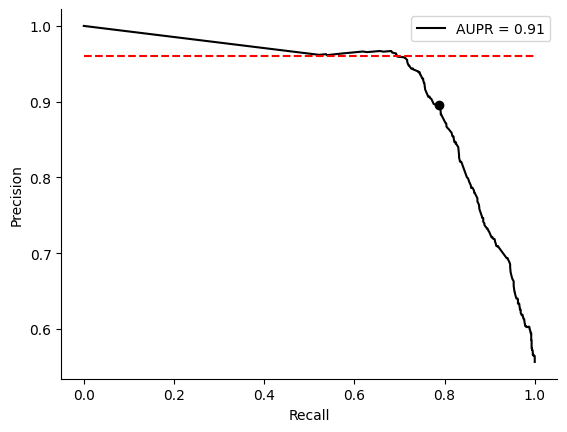

In [52]:
prec, rec, thres = precision_recall_curve(match_labels, match_scores)
f1_scores = 2*rec*prec/(rec+prec)
prec_maxf1 = prec[f1_scores.argmax()]
rec_maxf1 = rec[f1_scores.argmax()]

plt.plot(rec, prec, 'k-', label='AUPR = %.2f' % average_precision_score(match_labels, match_scores))
plt.plot([rec_maxf1], [prec_maxf1], 'ko')
plt.plot([0,1], [0.96, 0.96], 'r--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
sns.despine()
plt.savefig('../figures/Normalization-FuzzySet-Matching-PRCurve-Training.pdf')

In [53]:
df = pandas.DataFrame(list(zip(prec, rec, thres)), columns = ['Precision', 'Recall', 'Thresholds'])
df.tail(50).head(20)

,Precision,Recall,Thresholds
236,0.942953,0.729239,0.860000
237,0.944009,0.729239,0.862069
238,0.943820,0.726644,0.862745
239,0.943757,0.725779,0.863636
240,0.947727,0.721453,0.864865
241,0.947668,0.720588,0.866667
242,0.949714,0.718858,0.869565
243,0.952874,0.717128,0.870968
244,0.953970,0.717128,0.871795
245,0.955069,0.717128,0.875000


In [37]:
thres[f1_scores.argmax()]

0.8076923076923077